% ISOM 3025 Lect13
% Yi Ding
% 04 December 2022

# Lecture 13-14: Resampling Methods
Resampling methods are one of the most interesting inferential applications of stochastic
simulations and random numbers. They are particularly useful in the nonparametric
field, where the traditional inference methods cannot be correctly applied. They generate
random numbers to be assigned to random variables or random samples. They require
machine time related to the growth of repeated operations. They are very simple to
implement and once implemented, they are automatic. Selecting the required elements
must provide a sample that is, or at least can be, representative of the population. 

In this chapter, we will learn how to apply resampling methods
to approximate some characteristics of the distribution of a sample in order to validate a
statistical model. We will analyze the basics of the most common resampling methods and
learn how to use them by solving some practical cases.


## Outlines

In this lecture:


* Introducing resampling methods
* Jackknife
* Bootstrapping
* Application: Inference of Investment Sharpe Ratio
* Cross-validation
* Application: Optimization of an Investment Strategy




### Sampling concepts overview


**population**: the set, finite or unlimited, of all the elementary units to which a certain characteristic is attributed, which identifies them as homogeneous.

**Sampling**:  generates
a group of elementary units, that is, a subset of a population, with the same properties as
the entire population, at least with a defined risk of error.

**Statistical sampling (simple random sampling)**: is a method used to randomly select items so that every item in a
population has a known, non-zero probability of being included in the sample. Random selection is considered a powerful means of building a representative sample that, in its
structure and diversity, reflects the population under consideration. Statistical sampling
allows us to obtain an objective sample: the selection of an element does not depend
on the criteria defined for reasons of research convenience or availability and does not
systematically exclude and favor any group of elements within a population

In random sampling, associated with the calculation of probabilities, the following actions
are performed:
* Extrapolation of results through mathematical formulas and an estimate of the associated error
* Control over the risk of reaching an opposite conclusion to reality
* Calculation – through a formula – of the minimum sample size necessary to obtain a given level of accuracy and precision

### Reasoning about sampling



Sampling is used if not all the elements of the population are available. For
example, investigations into the past can only be done on available historical
data, which is often incomplete.

Sampling is indicated when there is a considerable amount of time being saved when achieving results. This is because even if electronic computers are used, the data-entry phase is significantly reduced if the investigation is limited to a few elements of the overall population.


### Pros and cons of sampling
When information is collected, a survey is performed on all the units that make up the
population under study. When an analysis is carried out on the information collected,
it is possible to use it only on part of the units that make up the population.

The pros of sampling are as follows:

* Cost reduction
* Reduction of time
* Reduction of the organizational load

The disadvantage of sampling is as follows:
* The sampling base is not always available or easy to know.---> resampling from samples.

Sampling can be performed by forced choice in cases where the reference population
is partially unknown in terms of composition or size. Sampling cannot always replace
a complete investigation, such as in the case of surveys regarding the movement of marital
status, births, and deaths: all individual cases must be known.




Important elements of sampling:
    
    1. the objective population in the detection statistics.
    2. sampling method and sample size
    3. the sample should be a good representative of the population. 
    
Example: Suppose that we want to evaluate the mean return performance of stock AMZN. 

1. We consider the monthly returns of AMZN from 2000 to 2023 as the population.
2. If we sample the returns from 2019-2023 as a sample. 

Question: Is the sample a good representative of the population?
    
    
    

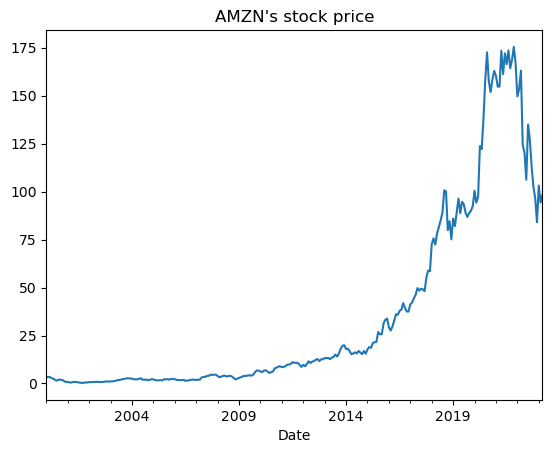

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import yfinance as yf

AMZN_df= pd.read_csv('AMZN_monthly.csv',header=0,usecols = ['Date','Close'],parse_dates=True,index_col='Date')    
AMZN_df['Close'].plot(title="AMZN's stock price")
AmznData=AMZN_df['Close']


# Resampling



## Introducing resampling methods

Resampling methods are a set of techniques based on the use of subsets of data, which can
be extracted either randomly or according to a systematic procedure. The purpose of this
technology is to approximate some characteristics of the sample distribution – a statistic,
a test, or an estimator – to validate a statistical model.

**Why Resample?**


Ideally, you would want to draw large, non-repeated, samples from a population in order to create a sampling distribution for a statistic. However, you may be limited to one sample. When resampling from the sample at hand, we treat the sample as a mini population. 

The following details can be observed from resampling methods:

* They repeat simple operations many times.
* They generate random numbers to be assigned to random variables or random samples.
* They require more machine time as the number of repeated operations grows.
* They are very simple to implement and once implemented, they are automatic.

Some widely used resampling techniques:

* **random extraction**: bootstrap
* **non-randomized extraction**: jackknife, cross-validation





## The Jackknife

This method is used to estimate characteristics such as the distortion and the standard
deviation of a statistic. This technique allows us to obtain the desired estimates without
necessarily resorting to parametric assumptions. Jackknife is based on calculating
the statistics of interest for the sub-samples we've obtained, leaving out one sample
observation at a time. The jackknife estimate is consistent for various sample statistics,
such as mean, variance, correlation coefficient, maximum likelihood estimator, and others.

### Defining the Jackknife method
The Jackknife method was proposed in 1949 by M. H. Quenouille who, due to the low
computational power of the time, created an algorithm that requires a fixed number of
accounts.


Suppose that, we want to make inference about $\theta$. Denote $\hat{\theta}$ as the estimator calculated using the whole sample $x=(x_1, ..., x_n)$. Ideally, we could use distribution of $\hat{\theta}$, e.g., $\hat{\theta}\sim N(\theta, \sigma^2)$. However, 1. $\hat{\theta}$ is not always unbiased, 2. the variance $\sigma$ is not always known, 3. the asymptotic normal maynot hold. 


We will use resampling techniques to learn distributions of $\hat{\theta}$.



Essentially, the Jackknife method reduces bias and can provide variance estimator for an estimator.


Jackknife samples are constructed by leaving an observation xi out of the original sample
each time, as shown in the following equation:

Leave-one-out:
$$
x_{(i)}=(x_1,...,x_{i-1},x_{i+1}, ..., x_n).
$$


Then $n$ samples of size $m = n-1$ are obtained. Let's take a look at an example. Consider
a sample of size $n = 5$ that produces five Jackknife samples of size $m = 4$, as follows:

$$
x_{(1)}=(x_2,x_{3},x_{4},x_{5})\\
x_{(2)}=(x_1,x_{3},x_{4},x_{5})\\
x_{(3)}=(x_1,x_{2},x_{4},x_{5})\\
x_{(4)}=(x_1,x_{2},x_{3},x_{5})\\
x_{(5)}=(x_1,x_{2},x_{3},x_{4}).
$$


And denote $\hat{\theta}_{(i)}$ as the estimator calculated using the $i$th Jackknife sample.
The procedure
is iterated $n$ times on each of the available Jackknife samples:
$$
x_{(1)}=(x_2,x_{3},x_{4},x_{5})\rightarrow\hat{\theta}_{(1)}\\
x_{(2)}=(x_1,x_{3},x_{4},x_{5})\rightarrow\hat{\theta}_{(2)}\\
x_{(3)}=(x_1,x_{2},x_{4},x_{5})\rightarrow\hat{\theta}_{(3)}\\
x_{(4)}=(x_1,x_{2},x_{3},x_{5})\rightarrow\hat{\theta}_{(4)}\\
x_{(5)}=(x_1,x_{2},x_{3},x_{4})\rightarrow\hat{\theta}_{(5)}.
$$
Th estimator $\hat{\theta}$ is estimated using all the data in sample
$$
x=(x_1, x_2, ..., x_5)\rightarrow \hat{\theta}.
$$


![](jackknife.jpg)
Figure 6.1 – Representation of the Jackknife method in MC20.


#### Jackknife estimator of estimator's variance

The jackknife variance estimator of $\hat{\theta}$ is
$$
var_{jackknife}(\hat{\theta})=\frac{n-1}{n}\sum_{i=1}^n(\hat{\theta}_{(i)}-\hat{\theta}_{(\cdot)})^2.
$$
where $\hat{\theta}_{(\cdot)}=\sum_{i=1}^n \hat{\theta}_{(i)}/n$ is the sample mean of $\hat{\theta}_{(i)}$.

The calculated standard deviation 

$$\sqrt{var_{jackknife}(\hat{\theta})}$$

will be used for building confidence intervals for
the parameter.




#### Jackknife estimator of estimator's bias

Recall that bias of estimator is 
$$
E(\hat{\theta})-\theta.
$$

Our estimator $\hat{\theta}$ maybe biased. Without knowning $\theta$, we estimate the bias of $\hat{\theta}$ using jackknife samples. 


The jackknife bias estimator of $\hat{\theta}$ is computed as follows:

$$
bias_{jackknife}(\hat{\theta})=(n-1)(\hat{\theta}_{(\cdot)}-\hat{\theta}).
$$


Then the resulting bias-corrected jackknife estimate of $\theta$ is

$${\hat {\theta }}_{\text{jack}}^{*}={\hat {\theta }}-bias_{jackknife}(\hat{\theta})=n{\hat {\theta }}-(n-1)\hat{\theta}_{(\cdot)}.$$




### Application: Inference of Sharpe ratio of returns


Sharpe ratio is an important measure of investment performance. It measures the reward-risk trade-off and is defined as follows
$$
SR=\frac{E(R)}{sd(R)}, $$where $R$ is excess returns.

With a sample of size $n$, $x=(R_1, ..., R_n)$, an simple estimator of SR using sample mean and sample standard deviation:

$$
\widehat{SR}=\frac{\overline{R}}{\sqrt{\sum_{t=1}^n (R_t-\overline{R})^2/(n-1)}},$$
where
$$\overline{R}=\sum_{t=1}^nR_t/n.$$
The estimator $\widehat{SR}$ is not unbiased. We use jackknife to debias and build up confidence interval.




In [62]:
import random
import statistics
import matplotlib.pyplot as plt


# suppose R follows uniform[0,1]
random.seed(5)

#get a sample with size n=50
DataSample=list()

for i in range(50):
    DataSample.append(random.random())

#print(DataSample)    
    
    

In [63]:
#defines our SR estimator
def SR_EST(Rt):
    hatSR= statistics.mean(Rt)/statistics.stdev(Rt)
    return hatSR

In [74]:
# compute hattheta

hatSR = SR_EST(Rt=DataSample)
print(hatSR)



1.57232920736562


In [65]:
#Population SR? 

# for uniform[a,b]
# mean (b-a)/2
# sd (b-a)/sqrt(12)
mu=0.5
sd=1/(12)**0.5
SR=mu/sd
print(SR)

1.732050807568877


Next we create jackknife samples and build jackknife estimators


In [71]:
N = len(DataSample)
JackhatSR = list()
JackSample=list()
print(N)

50


In [72]:
for i in range(N-1):
    JackSample.append(0)
for i in range(N):
    JackhatSR.append(0)
    
    
for i in range(N):
    for j in range(N):
        if(j < i):
            JackSample[j] = DataSample[j]
        else:
            if(j > i):
                JackSample[j-1]= DataSample[j]
    JackhatSR[i] = SR_EST(Rt=JackSample)
        

Compute jackknife debiased estimators and variance estimators

In [87]:
barJackhatSR=sum(JackhatSR)/N
#print(JackhatSR)
print(barJackhatSR)

BiasJackSR=(N-1)*(barJackhatSR-hatSR)
print(BiasJackSR)

# debiased estimator
DebiasedSR=hatSR-BiasJackSR
print(DebiasedSR)





1.5724860181349483
0.007683727697080034
1.56464547966854


In [88]:
# jackknifevariance
varjack=sum([(JackhatSR[i]-barJackhatSR)**2 for i in range(N)])
print(varjack)

CI=[DebiasedSR-varjack**0.5*2,DebiasedSR+varjack**0.5*2]
print(CI)

0.030477252869896148
[1.2154907697195196, 1.9138001896175605]



## Bootstrapping

The most well-known resampling technique is the one defined as bootstrapping, as
introduced by B. Efron in 1993. The logic of the bootstrap method is to build samples that
are not observed, but statistically like those observed. This is achieved by resampling the
observed series through an extraction procedure where we reinsert the observations.


### Introducing bootstrapping

Bootstrap is a statistical resampling technique with reentry so that we can approximate
the sample distribution of a statistic, i.e., **resampling with replacement**. It therefore allows us to approximate the mean
and variance of an estimator so that we can build confidence intervals and calculate test
p-values when the distribution of the statistics of interest is not known.


![](bootstrap.png)
Bootstrap analogy-- The russian dolls (from Hall, 1992).



This procedure is like extracting a number from an urn, with subsequent reinsertion
of the number before the next extraction. Once a statistical test has been chosen, it is
calculated both on the observed sample and on a large number of samples of the same
size as that observed and obtained by resampling. The N values of the test statistic then
allow us to define the sample distribution; that is, the empirical distribution of the
chosen statistic.

Since the bootstrapped samples derive from a random extraction process with
reintegration from the original series, any temporal correlation structure of the observed
series is not preserved. It follows that bootstrapped samples have properties such as the
observed sample, but respect, at least approximately, the hypothesis of independence.
This makes them suitable for calculating test statistics distributions, assuming there's
a null hypothesis for the absence of trends, change points, or of a generic systematic
temporal trend.



In the simple case of simple random sampling, the operation is as follows. Consider an
observed sample with n elements, as described by the following equation:

$$
x=(x_1,...,x_n).
$$

From this distribution, m other samples of a constant number equal to n, say $x^\star_1, ..., x
^\star_m$, are resampled. In each bootstrap extraction, the data from the first element of the
sample can be extracted more than once. Each one that's provided has a probability equal
to $1 / n$ of being extracted.

From each sample $x^\star_{i}$, we get an estimator $\hat{\theta}^{\star}_i$. These values $(\hat{\theta}^{\star}_i)_{1\leq i\leq m}$ carry information on $\theta$. Therefore, starting from these estimated quantities, it is possible to calculate confidence
intervals, test hypotheses, and so on.


Specifically, destribution of $\hat{\theta}-\theta$ is approximated using the empirical distributions of $(\hat{\theta}^{\star}_i-\hat{\theta})_{1\leq i\leq m}$.


### Bootstrap resampling using Python
We proceed in a similar way to what we did for Jackknife resampling. We will generate a
random distribution, carry out a resampling according to the bootstrap method, and then
compare the results. Let's see the code step by step in order to understand the procedure.

Let us continue with our previous example. 

In [28]:
import random
import statistics
import matplotlib.pyplot as plt


# suppose R follows uniform[0,1]
random.seed(5)

#get a sample with size n=50
DataSample=list()

for i in range(50):
    DataSample.append(random.random())

#print(DataSample)    
    

In [89]:
#Now, we can apply the bootstrap method, as follows:
random.seed(5)
bootstrapSRs = list()
for i in range(10000):
    SampleI = random.choices(DataSample, k=50)
    bootstrapSRs.append(SR_EST(SampleI))

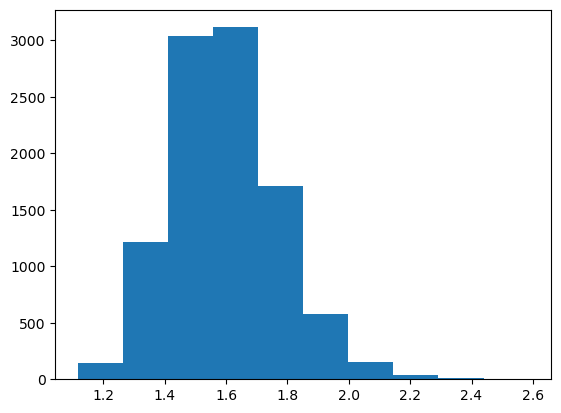

In [90]:
#We now print a histogram of the sample we obtained to visualize its distribution:
plt.hist(bootstrapSRs)
plt.show()



The bootstrapped distributions of $\hat{\theta}-\theta$:
    

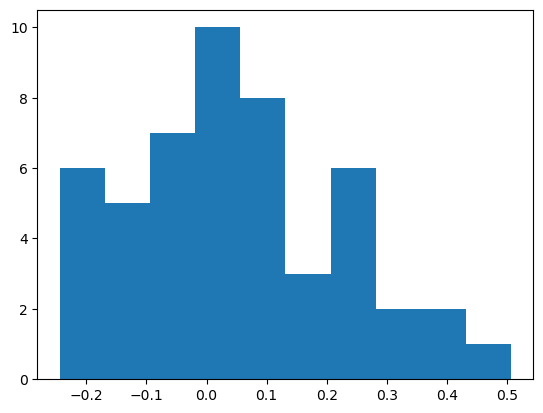

In [91]:
plt.hist([bootstrapSRs[i] -hatSR for i in range(50)] )
plt.show()

Using the bootstrap distribution to build confidence interval of $\theta$:

$$
   [\hat{\theta}-F_{bootstrap,n}^{-1}(0.975), \hat{\theta}-F_{bootstrap,n}^{-1}(0.225)],
    $$
where $F_{bootstrap,n}$ is empirical distribution of $(\hat{\theta}^{\star}_i-\hat{\theta})_{1\leq i\leq m}$, and $F_{bootstrap,n}(x)^{-1}$ is its $x$ quantile.  
    

In [95]:
F1=np.quantile([bootstrapSRs[i] -hatSR for i in range(50)],0.975)
F2=np.quantile([bootstrapSRs[i] -hatSR for i in range(50)],0.025)

In [96]:
#CI
[hatSR-F1,hatSR-F2]

[1.1662182621702561, 1.786082675994273]

### Comparing Jackknife and bootstrap
* Bootstrap requires approximately 10 times more computational effort. 
Jackknife can, at least theoretically, be done by hand.
* Bootstrap is conceptually simpler than Jackknife. Jackknife requires n repetitions
for a sample of n, while bootstrap requires a certain number of repetitions. This
leads to choosing a number to use, which is not always an easy task. A general
rule of thumb is that this number is 1,000 unless you have access to a great deal of
computing power.

* Bootstrap introduces errors due to having additional sources of variation due to
the finished resampling. Note that this error is reduced for large sizes or where only
specific bootstrap sample sets are used.

* Jackknife is more conservative than bootstrap as it produces slightly larger
estimated standard errors.
* Jackknife always provides the same results, due to the small differences between the
replicas. Bootstrap, on the other hand, provides different results each time it is run.
* Jackknife tends to work best for estimating the confidence interval for pair
agreement measures.
* Bootstrap performs better for distorted distributions.
* Jackknife is best suited for small samples of original data.

Next: 

* Cross-validation
* Application of Cross-validation in constructing optimal investment strategy 
    
Reference:
    GC: Chapter 6
    